In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv1D,Flatten,MaxPool1D,Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#The dataset contains no header for columns, hence the header parameter
abnormal=pd.read_csv('./ptbdb_abnormal.csv',header=None)
normal=pd.read_csv('./ptbdb_normal.csv',header=None)

In [3]:
data = pd.concat([abnormal, normal]).sample(frac=1).reset_index(drop=True)

In [4]:
Y=data[data.columns[-1:]]
X=data[data.columns[:-2]]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(x_train.shape)

(10914, 186)


In [6]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,186,1])

In [7]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,186,1])

In [8]:
model = tf.keras.models.Sequential()

#First CNN layer  with 32 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (x_train.shape[1],1)))

#Second CNN layer  with 64 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=64, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Fourth CNN layer with Max pooling
model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
model.add(Dropout(0.5))

#Flatten the output
model.add(Flatten())

#Add a dense layer with 512 neurons
model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Add a dense layer with 1024 neurons
model.add(Dense(units = 1024, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Softmax as last layer with two outputs
model.add(Dense(units = 1, activation='sigmoid'))

In [9]:
model.compile(optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
342/342 [==============================] - 26s 72ms/step - loss: 0.3096 - accuracy: 0.8653
Epoch 2/10
342/342 [==============================] - 23s 67ms/step - loss: 0.1391 - accuracy: 0.9464
Epoch 3/10
342/342 [==============================] - 23s 68ms/step - loss: 0.0763 - accuracy: 0.9733
Epoch 4/10
342/342 [==============================] - 24s 70ms/step - loss: 0.0612 - accuracy: 0.9796
Epoch 5/10
342/342 [==============================] - 24s 69ms/step - loss: 0.0385 - accuracy: 0.9861
Epoch 6/10
342/342 [==============================] - 23s 68ms/step - loss: 0.0288 - accuracy: 0.9896
Epoch 7/10
342/342 [==============================] - 23s 66ms/step - loss: 0.0293 - accuracy: 0.9896
Epoch 8/10
342/342 [==============================] - 23s 68ms/step - loss: 0.0190 - accuracy: 0.9939
Epoch 9/10
342/342 [==============================] - 22s 63ms/step - loss: 0.0183 - accuracy: 0.9936
Epoch 10/10
342/342 [==============================] - 22s 63ms/step - loss: 0.023

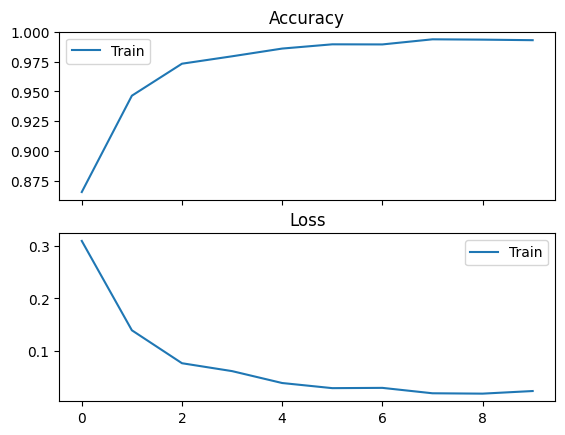

In [10]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
# ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
# ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [11]:
model.evaluate(x_test, y_test, verbose=True)

114/114 [==============================] - 1s 11ms/step - loss: 0.0292 - accuracy: 0.9909


[0.02921311743557453, 0.9909290671348572]

In [12]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

114/114 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1026
         1.0       0.99      0.99      0.99      2612

    accuracy                           0.99      3638
   macro avg       0.99      0.99      0.99      3638
weighted avg       0.99      0.99      0.99      3638

